% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


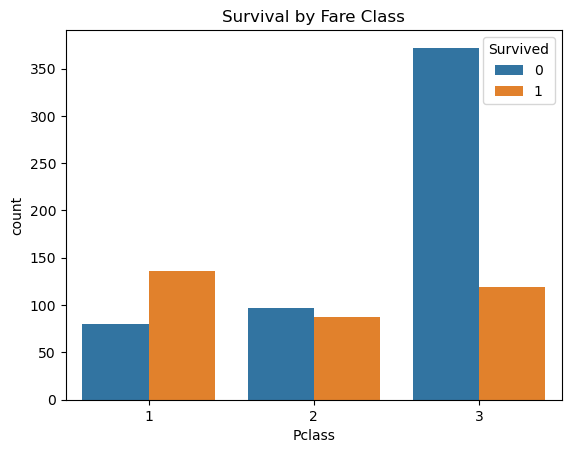

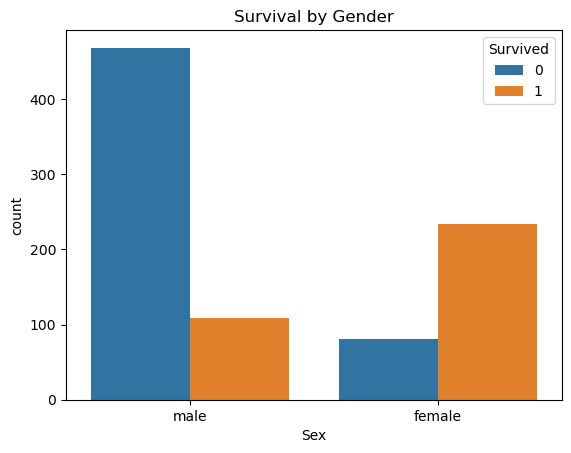

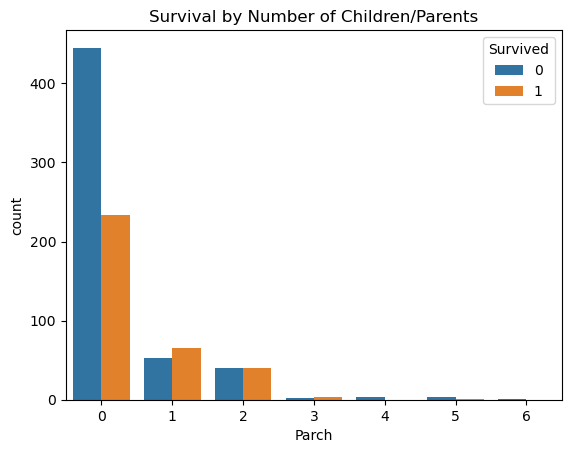

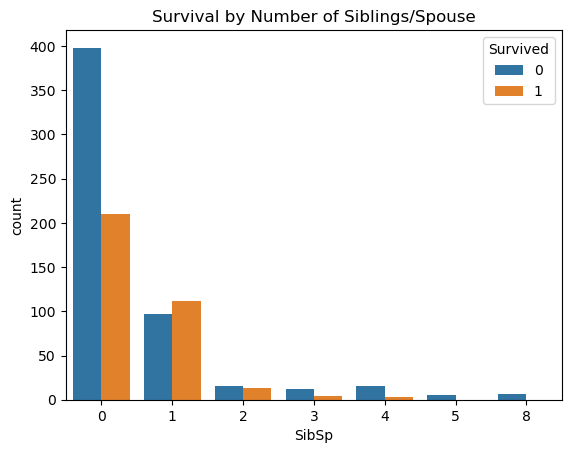

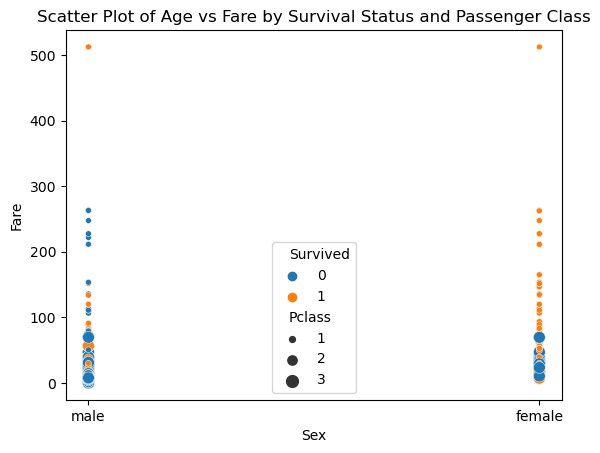

In [24]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import pandas as pd
from sklearn.ensemble import RandomForestClassifier

'''
Using Kaggle data to find predictors of survival on the
Titanic
'''

# ----------------------------------------
# Create train/test vars
# ---------------------------------------
train_data = pd.read_csv('train.csv')
train_data.head()

test_data = pd.read_csv('test.csv')
test_data.head()

# ----------------------------------------
# Check Hypothesis of gender survival
# ----------------------------------------
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print(f"% of women who survived: {rate_women}")

men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)
print(f"% of men who survived: {rate_men}")

# ----------------------------------------
# Test Data with random forest classifier
# ----------------------------------------
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")


import seaborn as sns
import matplotlib.pyplot as plt

# # Pairplot to visualize relationships between features
# sns.pairplot(train_data[features + ["Survived"]], hue="Survived", diag_kind="kde")
# plt.show()

# Bar plot showing survival counts by passenger class
plt.title('Survival by Fare Class')
sns.countplot(x="Pclass", hue="Survived", data=train_data)
plt.show()

# Bar plot showing survival counts by passenger class
plt.title('Survival by Gender')
sns.countplot(x="Sex", hue="Survived", data=train_data)
plt.show()

# Bar plot showing survival counts by passenger class
plt.title('Survival by Number of Children/Parents')
sns.countplot(x="Parch", hue="Survived", data=train_data)
plt.show()

# Bar plot showing survival counts by passenger class
plt.title('Survival by Number of Siblings/Spouse')
sns.countplot(x="SibSp", hue="Survived", data=train_data)
plt.show()

# # Create a scatter plot of age vs fare, color-coded by survival status and sized by passenger class
# sns.scatterplot(x='Sex', y='Fare', hue='Survived', size='Pclass', data=train_data)
# plt.title('Scatter Plot of Age vs Fare by Survival Status and Passenger Class')
# plt.show()


